In [88]:
#### Librerias #####
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import plotly.express as px
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix





%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 





In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Analisis Gráfico de la data

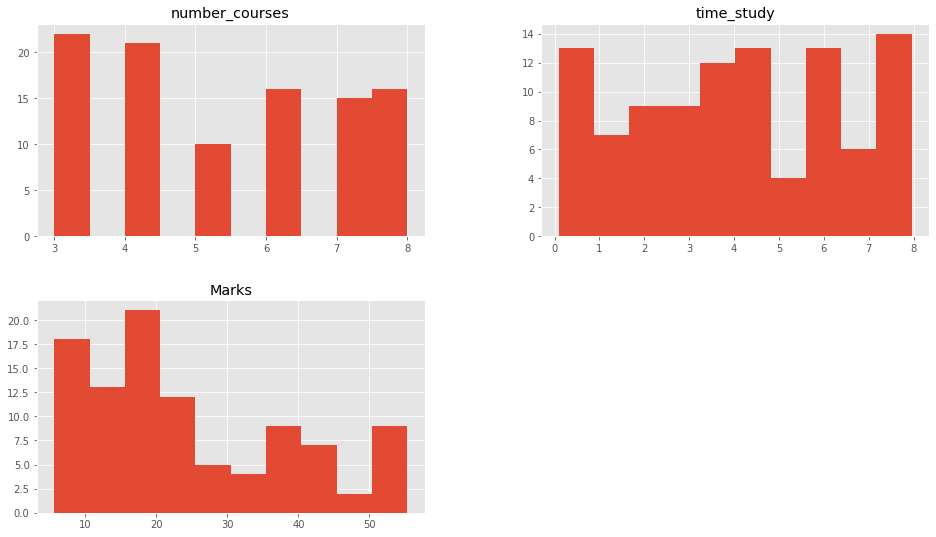

In [89]:
data = pd.read_csv('/content/drive/MyDrive/Trabajo python Intermedio/Student_Marks.csv')

data.hist()
plt.show()

In [118]:
X = data["time_study"].values
Y = data["Marks"].values

In [119]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None


Text(0, 0.5, 'Notas')

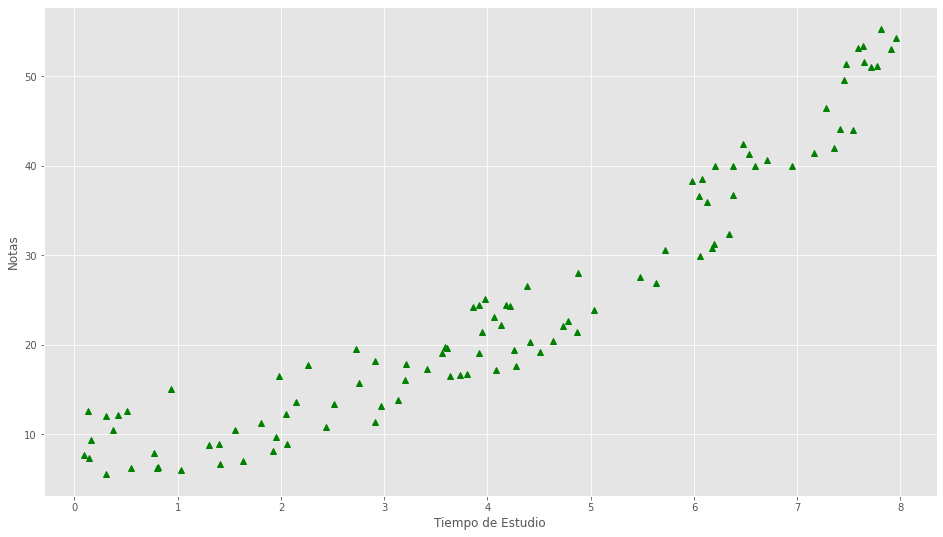

In [120]:
plt.plot(X,Y,'g^')
plt.xlabel('Tiempo de Estudio')
plt.ylabel('Notas')

#Analisis estadístico de la Data

In [127]:
	
data.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


#Entrenamiento de Modelo

In [124]:
print(np.shape(X))
print(np.shape(Y))
#corregimos el vector
Y=np.reshape(Y, (100,1))
X=np.reshape(X, (100,1))
print(np.shape(Y))
print(np.shape(X))

Xtrain, Xtest,Ytrain,Ytest=tts(X,Y, random_state= 42)#dividimos la data
modelrf= rfr(n_estimators=42,random_state=42)
modelrf.fit(Xtrain, Ytrain)#entrenamos el modelo

"""
verificamos los resultados
"""

ypred= modelrf.predict(Xtest)
R2RF= r2_score(Ytest,ypred)
print(R2RF)# r2 de la data de validacion
#ahora analizamos el r de la data de entrenamiento 
ypred_t= modelrf.predict(Xtrain)
R2RT= r2_score(Ytrain,ypred_t)
print(R2RT)

print(R2RF,R2RT)



(100,)
(100, 1)
(100, 1)
(100, 1)
0.9384103630838895
0.9886880797103555
0.9384103630838895 0.9886880797103555


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



#Programa terminal que me da la prediccion para cualquier dato

In [126]:
# y entrenarlo con los datos de nuestro csv
regression_model = linear_model.LinearRegression()
print ("Training model...")
# entrenamiento del modelo
regression_model.fit(data[['Marks']], data.time_study) 
print ("Model trained.")
# pedir al usuario que introduzca un area y calcular
# su precio usando nuestro modelo
input_nota = int(input("Enter la nota a obtener: "))
proped_time = regression_model.predict([[input_nota]])
print ("las horas a estudiar son:", round(proped_time[0], 2))

Training model...
Model trained.
Enter la nota a obtener: 16
las horas a estudiar son: 2.76


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

